In [116]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import seaborn as sns

In [117]:
# Label:
#     - The hourly average gb/gub per plan per scan at city-level
#     - Unit: Local currency

# Feature Set:
#     avg(plans.driver_cancel_prob) as market_driver_cancel_prob,
#     avg(plans.rider_cancel_prob) as market_rider_cancel_prob,
#     avg(plans.spinner_cancel_prob) as market_spinner_cancel_prob,
#     avg(plans.eta) as market_eta,
#     avg(plans.surge_mul) as market_surge_mul,
#     avg(plans.eventual_comp_prob) as market_eventual_comp_prob,
#     avg(completed.client_upfront_fare_local) as market_gb,
#     avg(completed.base_fare_local) as market_gub,

#     avg(plans.eta_one) as market_eta_one,  -- (1 - eta/1500)
#     avg(plans.eta_one_twenty) as market_eta_one_twenty, -- (1 - eta/1500)^1.2
#     avg(plans.eta_one_quarter) as market_eta_one_quarter, -- (1 - eta/1500)^1.25
#     avg(plans.eta_square) as market_eta_square,  -- (1 - eta/1500)**2
#     avg(plans.eta_cube) as market_eta_cube,  -- (1 - eta/1500)**3
#     avg(plans.network_contention_2) as market_network_contention_2,  -- 1 / (1 + surge_mul**2)
#     avg(plans.network_contention_3) as market_network_contention_3,  -- 1 / (1 + surge_mul**3)
#     avg(plans.network_contention_5) as market_network_contention_5,  -- 1 / (1 + surge_mul**5)

#     avg(plans.cr_ratio) as market_cr_ratio,  -- (1.0 - mgv.driver_cancel_prob) * (1.0 - mgv.rider_cancel_prob) * (1.0 - mgv.spinner_cancel_prob) + mgv.eventual_comp_prob * mgv.driver_cancel_prob

#     avg(plans.eta_one * plans.cr_ratio) as market_eta_one_cr_ratio,
#     avg(plans.eta_one_twenty * plans.cr_ratio) as market_eta_one_twenty_cr_ratio,
#     avg(plans.eta_one_quarter * plans.cr_ratio) as market_eta_one_quarter_cr_ratio,
#     avg(plans.eta_square * plans.cr_ratio) as market_eta_square_cr_ratio,
#     avg(plans.eta_cube * plans.cr_ratio) as market_eta_cube_cr_ratio,
#     avg(plans.network_contention_2 * plans.eta_one) as market_network_2_eta_1,
#     avg(plans.network_contention_3 * plans.eta_one) as market_network_3_eta_1,
#     avg(plans.network_contention_5 * plans.eta_one) as market_network_5_eta_1,
#     avg(plans.network_contention_2 * plans.eta_one_twenty) as market_network_2_eta_1_20,
#     avg(plans.network_contention_3 * plans.eta_one_twenty) as market_network_3_eta_1_20,
#     avg(plans.network_contention_5 * plans.eta_one_twenty) as market_network_5_eta_1_20,
#     avg(plans.network_contention_2 * plans.eta_one_quarter) as market_network_2_eta_1_25,
#     avg(plans.network_contention_3 * plans.eta_one_quarter) as market_network_3_eta_1_25,
#     avg(plans.network_contention_5 * plans.eta_one_quarter) as market_network_5_eta_1_25,
#     avg(plans.network_contention_2 * plans.eta_square) as market_network_2_eta_2,
#     avg(plans.network_contention_3 * plans.eta_square) as market_network_3_eta_2,
#     avg(plans.network_contention_5 * plans.eta_square) as market_network_5_eta_2,
#     avg(plans.network_contention_2 * plans.eta_cube) as market_network_2_eta_3,
#     avg(plans.network_contention_3 * plans.eta_cube) as market_network_3_eta_3,
#     avg(plans.network_contention_5 * plans.eta_cube) as market_network_5_eta_3,
#     avg((1 - plans.network_contention_2) * plans.cr_ratio) as market_network_2_cr_ratio,
#     avg((1 - plans.network_contention_3) * plans.cr_ratio) as market_network_3_cr_ratio,
#     avg((1 - plans.network_contention_5) * plans.cr_ratio) as market_network_5_cr_ratio,
#     avg(plans.eta_one * plans.network_contention_2 * plans.cr_ratio) as market_network_2_eta_1_cr_ratio,
#     avg(plans.eta_one * plans.network_contention_3 * plans.cr_ratio) as market_network_3_eta_1_cr_ratio,
#     avg(plans.eta_one * plans.network_contention_5 * plans.cr_ratio) as market_network_5_eta_1_cr_ratio,
#     avg(plans.eta_one_twenty * plans.network_contention_2 * plans.cr_ratio) as market_network_2_eta_1_20_cr_ratio,
#     avg(plans.eta_one_twenty * plans.network_contention_3 * plans.cr_ratio) as market_network_3_eta_1_20_cr_ratio,
#     avg(plans.eta_one_twenty * plans.network_contention_5 * plans.cr_ratio) as market_network_5_eta_1_20_cr_ratio,
#     avg(plans.eta_one_quarter * plans.network_contention_2 * plans.cr_ratio) as market_network_2_eta_1_25_cr_ratio,
#     avg(plans.eta_one_quarter * plans.network_contention_3 * plans.cr_ratio) as market_network_3_eta_1_25_cr_ratio,
#     avg(plans.eta_one_quarter * plans.network_contention_5 * plans.cr_ratio) as market_network_5_eta_1_25_cr_ratio,
#     avg(plans.eta_square * plans.network_contention_2 * plans.cr_ratio) as market_network_2_eta_2_cr_ratio,
#     avg(plans.eta_square * plans.network_contention_3 * plans.cr_ratio) as market_network_3_eta_2_cr_ratio,
#     avg(plans.eta_square * plans.network_contention_5 * plans.cr_ratio) as market_network_5_eta_2_cr_ratio,
#     avg(plans.eta_cube * plans.network_contention_2 * plans.cr_ratio) as market_network_2_eta_3_cr_ratio,
#     avg(plans.eta_cube * plans.network_contention_3 * plans.cr_ratio) as market_network_3_eta_3_cr_ratio,
#     avg(plans.eta_cube * plans.network_contention_5 * plans.cr_ratio) as market_network_5_eta_3_cr_ratio,
#         avg(plans.eta_one * (1 - plans.network_contention_2) * plans.cr_ratio * completed.client_upfront_fare_local) as market_network_2_eta_1_gb_cr_ratio,
#         avg(plans.eta_one * (1 - plans.network_contention_3) * plans.cr_ratio * completed.client_upfront_fare_local) as market_network_3_eta_1_gb_cr_ratio,
#         avg(plans.eta_one * (1 - plans.network_contention_5) * plans.cr_ratio * completed.client_upfront_fare_local) as market_network_5_eta_1_gb_cr_ratio,
#         avg(plans.eta_one_twenty * (1 - plans.network_contention_2) * plans.cr_ratio * completed.client_upfront_fare_local) as market_network_2_eta_1_20_gb_cr_ratio,
#         avg(plans.eta_one_twenty * (1 - plans.network_contention_3) * plans.cr_ratio * completed.client_upfront_fare_local) as market_network_3_eta_1_20_gb_cr_ratio,
#         avg(plans.eta_one_twenty * (1 - plans.network_contention_5) * plans.cr_ratio * completed.client_upfront_fare_local) as market_network_5_eta_1_20_gb_cr_ratio,
#         avg(plans.eta_one_quarter * (1 - plans.network_contention_2) * plans.cr_ratio * completed.client_upfront_fare_local) as market_network_2_eta_1_25_gb_cr_ratio,
#         avg(plans.eta_one_quarter * (1 - plans.network_contention_3) * plans.cr_ratio * completed.client_upfront_fare_local) as market_network_3_eta_1_25_gb_cr_ratio,
#         avg(plans.eta_one_quarter * (1 - plans.network_contention_5) * plans.cr_ratio * completed.client_upfront_fare_local) as market_network_5_eta_1_25_gb_cr_ratio,
#         avg(plans.eta_square * (1 - plans.network_contention_2) * plans.cr_ratio * completed.client_upfront_fare_local) as market_network_2_eta_2_gb_cr_ratio,
#         avg(plans.eta_square * (1 - plans.network_contention_3) * plans.cr_ratio * completed.client_upfront_fare_local) as market_network_3_eta_2_gb_cr_ratio,
#         avg(plans.eta_square * (1 - plans.network_contention_5) * plans.cr_ratio * completed.client_upfront_fare_local) as market_network_5_eta_2_gb_cr_ratio,
#         avg(plans.eta_cube * (1 - plans.network_contention_2) * plans.cr_ratio * completed.client_upfront_fare_local) as market_network_2_eta_3_gb_cr_ratio,
#         avg(plans.eta_cube * (1 - plans.network_contention_3) * plans.cr_ratio * completed.client_upfront_fare_local) as market_network_3_eta_3_gb_cr_ratio,
#         avg(plans.eta_cube * (1 - plans.network_contention_5) * plans.cr_ratio * completed.client_upfront_fare_local) as market_network_5_eta_3_gb_cr_ratio,
#         avg(plans.eta_one * (1 - plans.network_contention_2) * plans.cr_ratio * completed.base_fare_local) as market_network_2_eta_1_gub_cr_ratio,
#         avg(plans.eta_one * (1 - plans.network_contention_3) * plans.cr_ratio * completed.base_fare_local) as market_network_3_eta_1_gub_cr_ratio,
#         avg(plans.eta_one * (1 - plans.network_contention_5) * plans.cr_ratio * completed.base_fare_local) as market_network_5_eta_1_gub_cr_ratio,
#         avg(plans.eta_one_twenty * (1 - plans.network_contention_2) * plans.cr_ratio * completed.base_fare_local) as market_network_2_eta_1_20_gub_cr_ratio,
#         avg(plans.eta_one_twenty * (1 - plans.network_contention_3) * plans.cr_ratio * completed.base_fare_local) as market_network_3_eta_1_20_gub_cr_ratio,
#         avg(plans.eta_one_twenty * (1 - plans.network_contention_5) * plans.cr_ratio * completed.base_fare_local) as market_network_5_eta_1_20_gub_cr_ratio,
#         avg(plans.eta_one_quarter * (1 - plans.network_contention_2) * plans.cr_ratio * completed.base_fare_local) as market_network_2_eta_1_25_gub_cr_ratio,
#         avg(plans.eta_one_quarter * (1 - plans.network_contention_3) * plans.cr_ratio * completed.base_fare_local) as market_network_3_eta_1_25_gub_cr_ratio,
#         avg(plans.eta_one_quarter * (1 - plans.network_contention_5) * plans.cr_ratio * completed.base_fare_local) as market_network_5_eta_1_25_gub_cr_ratio,
#         avg(plans.eta_square * (1 - plans.network_contention_2) * plans.cr_ratio * completed.base_fare_local) as market_network_2_eta_2_gub_cr_ratio,
#         avg(plans.eta_square * (1 - plans.network_contention_3) * plans.cr_ratio * completed.base_fare_local) as market_network_3_eta_2_gub_cr_ratio,
#         avg(plans.eta_square * (1 - plans.network_contention_5) * plans.cr_ratio * completed.base_fare_local) as market_network_5_eta_2_gub_cr_ratio,
#         avg(plans.eta_cube * (1 - plans.network_contention_2) * plans.cr_ratio * completed.base_fare_local) as market_network_2_eta_3_gub_cr_ratio,
#         avg(plans.eta_cube * (1 - plans.network_contention_3) * plans.cr_ratio * completed.base_fare_local) as market_network_3_eta_3_gub_cr_ratio,
#         avg(plans.eta_cube * (1 - plans.network_contention_5) * plans.cr_ratio * completed.base_fare_local) as market_network_5_eta_3_gub_cr_ratio

In [118]:
# Read in data: features & labels
df_features_dict = {}
df_labels_dict = {}

num_feature_files = 15
num_label_files = 15

for i in range(1, num_feature_files):
    df_features_dict[i] = pd.read_csv(f'latam_hourly_more_features_local_currency_{i}.csv')

for i in range(1, num_label_files):
    df_labels_dict[i] = pd.read_csv(f'latam_hourly_more_labels_{i}.csv')

In [119]:
df_features_frames = [df_features_dict[1], df_features_dict[2], df_features_dict[3],
                      df_features_dict[4], df_features_dict[5], df_features_dict[6],
                      df_features_dict[7], df_features_dict[8], df_features_dict[9],
                      df_features_dict[10], df_features_dict[11], df_features_dict[12],
                      df_features_dict[13], df_features_dict[14]
                     ]

df_labels_frames = [df_labels_dict[1], df_labels_dict[2], df_labels_dict[3],
                    df_labels_dict[4], df_labels_dict[5], df_labels_dict[6],
                    df_labels_dict[7], df_labels_dict[8], df_labels_dict[9],
                    df_labels_dict[10], df_labels_dict[11], df_labels_dict[12],
                    df_labels_dict[13], df_labels_dict[14]
                   ]

df_features = pd.concat(df_features_frames, ignore_index=True)
df_labels = pd.concat(df_labels_frames, ignore_index=True)

df_features.drop('num_plans', axis=1, inplace=True)
df_labels.drop('num_plans', axis=1, inplace=True)

df = pd.merge(df_features, df_labels,
              how='left',
              left_on=['datestr', 'city_id', 'hour_of_day'],
              right_on=['datestr', 'city_id', 'hour_of_day']
             )

In [120]:
gb_100 = df['hour_gb_gamma_100']
gb_99 = df['hour_gb_gamma_99']
gb_95 = df['hour_gb_gamma_95']
gb_90 = df['hour_gb_gamma_90']

gub_100 = df['hour_gub_gamma_100']
gub_99 = df['hour_gub_gamma_99']
gub_95 = df['hour_gub_gamma_95']
gub_90 = df['hour_gub_gamma_90']

X = df.loc[:, ['market_driver_cancel_prob',
                'market_rider_cancel_prob',
                'market_spinner_cancel_prob',
                'market_surge_mul',
                'market_eventual_comp_prob',
                'market_eta_one',
                'market_eta_one_twenty',
                'market_eta_one_quarter',
                'market_eta_square',
                'market_eta_cube',
                'market_network_contention_2',
                'market_network_contention_3',
                'market_network_contention_5',
                'market_cr_ratio',
                'market_eta_one_cr_ratio',
                'market_eta_one_twenty_cr_ratio',
                'market_eta_square_cr_ratio',
                'market_eta_cube_cr_ratio',
                'market_network_2_eta_1',
                'market_network_3_eta_1',
                'market_network_5_eta_1',
                'market_network_2_eta_1_20',
                'market_network_3_eta_1_20',
                'market_network_5_eta_1_20',
                'market_network_2_eta_1_25',
                'market_network_3_eta_1_25',
                'market_network_5_eta_1_25',
                'market_network_2_eta_2',
                'market_network_3_eta_2',
                'market_network_5_eta_2',
                'market_network_2_eta_3',
                'market_network_3_eta_3',
                'market_network_5_eta_3',
                'market_network_2_cr_ratio',
                'market_network_3_cr_ratio',
                'market_network_5_cr_ratio',
                'market_network_2_eta_1_cr_ratio',
                'market_network_3_eta_1_cr_ratio',
                'market_network_5_eta_1_cr_ratio',
                'market_network_2_eta_1_20_cr_ratio',
                'market_network_3_eta_1_20_cr_ratio',
                'market_network_5_eta_1_20_cr_ratio',
                'market_network_2_eta_1_25_cr_ratio',
                'market_network_3_eta_1_25_cr_ratio',
                'market_network_5_eta_1_25_cr_ratio',
                'market_network_2_eta_2_cr_ratio',
                'market_network_3_eta_2_cr_ratio',
                'market_network_5_eta_2_cr_ratio',
                'market_network_2_eta_3_cr_ratio',
                'market_network_3_eta_3_cr_ratio',
                'market_network_5_eta_3_cr_ratio',
                'market_network_2_eta_1_gb_cr_ratio',
                'market_network_3_eta_1_gb_cr_ratio',
                'market_network_5_eta_1_gb_cr_ratio',
                'market_network_2_eta_1_20_gb_cr_ratio',
                'market_network_3_eta_1_20_gb_cr_ratio',
                'market_network_5_eta_1_20_gb_cr_ratio',
                'market_network_2_eta_1_25_gb_cr_ratio',
                'market_network_3_eta_1_25_gb_cr_ratio',
                'market_network_5_eta_1_25_gb_cr_ratio',
                'market_network_2_eta_2_gb_cr_ratio',
                'market_network_3_eta_2_gb_cr_ratio',
                'market_network_5_eta_2_gb_cr_ratio',
                'market_network_2_eta_3_gb_cr_ratio',
                'market_network_3_eta_3_gb_cr_ratio',
                'market_network_5_eta_3_gb_cr_ratio',
                'market_network_2_eta_1_gub_cr_ratio',
                'market_network_3_eta_1_gub_cr_ratio',
                'market_network_5_eta_1_gub_cr_ratio',
                'market_network_2_eta_1_20_gub_cr_ratio',
                'market_network_3_eta_1_20_gub_cr_ratio',
                'market_network_5_eta_1_20_gub_cr_ratio',
                'market_network_2_eta_1_25_gub_cr_ratio',
                'market_network_3_eta_1_25_gub_cr_ratio',
                'market_network_5_eta_1_25_gub_cr_ratio',
                'market_network_2_eta_2_gub_cr_ratio',
                'market_network_3_eta_2_gub_cr_ratio',
                'market_network_5_eta_2_gub_cr_ratio',
                'market_network_2_eta_3_gub_cr_ratio',
                'market_network_3_eta_3_gub_cr_ratio',
                'market_network_5_eta_3_gub_cr_ratio'
              ]
          ]

In [121]:
df[
    [
        'hour_gb_gamma_100',
        'hour_gb_gamma_99',
        'hour_gb_gamma_95',
        'hour_gb_gamma_90',
        'hour_gub_gamma_100',
        'hour_gub_gamma_99',
        'hour_gub_gamma_95',
        'hour_gub_gamma_90'
    ]
  ].describe()

,hour_gb_gamma_100,hour_gb_gamma_99,hour_gb_gamma_95,hour_gb_gamma_90,hour_gub_gamma_100,hour_gub_gamma_99,hour_gub_gamma_95,hour_gub_gamma_90
count,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000
mean,3.912413,2.955480,1.249845,0.655962,0.557343,0.421012,0.178109,0.093614
std,1.130876,0.850644,0.372149,0.208106,0.152332,0.115368,0.051412,0.028895
min,2.399916,1.803721,0.586580,0.206176,0.425618,0.295636,0.085017,0.030382
25%,3.088452,2.340416,0.982171,0.508788,0.470402,0.353967,0.148106,0.077128
50%,3.512502,2.648006,1.131412,0.595973,0.512405,0.379241,0.164892,0.087385
75%,4.492065,3.396019,1.439964,0.767031,0.576816,0.436192,0.188720,0.100998
max,11.058756,8.316370,3.688448,2.095657,1.046694,0.801942,0.381913,0.234290


In [122]:
df[
    [
        'market_network_2_eta_1_gb_cr_ratio',
        'market_network_3_eta_1_gb_cr_ratio',
        'market_network_5_eta_1_gb_cr_ratio',
        'market_network_2_eta_1_20_gb_cr_ratio',
        'market_network_3_eta_1_20_gb_cr_ratio',
        'market_network_5_eta_1_20_gb_cr_ratio',
        'market_network_2_eta_1_25_gb_cr_ratio',
        'market_network_3_eta_1_25_gb_cr_ratio',
        'market_network_5_eta_1_25_gb_cr_ratio',
        'market_network_2_eta_2_gb_cr_ratio',
        'market_network_3_eta_2_gb_cr_ratio',
        'market_network_5_eta_2_gb_cr_ratio',
        'market_network_2_eta_3_gb_cr_ratio',
        'market_network_3_eta_3_gb_cr_ratio',
        'market_network_5_eta_3_gb_cr_ratio',
    ]
].describe()

,market_network_2_eta_1_gb_cr_ratio,market_network_3_eta_1_gb_cr_ratio,market_network_5_eta_1_gb_cr_ratio,market_network_2_eta_1_20_gb_cr_ratio,market_network_3_eta_1_20_gb_cr_ratio,market_network_5_eta_1_20_gb_cr_ratio,market_network_2_eta_1_25_gb_cr_ratio,market_network_3_eta_1_25_gb_cr_ratio,market_network_5_eta_1_25_gb_cr_ratio,market_network_2_eta_2_gb_cr_ratio,market_network_3_eta_2_gb_cr_ratio,market_network_5_eta_2_gb_cr_ratio,market_network_2_eta_3_gb_cr_ratio,market_network_3_eta_3_gb_cr_ratio,market_network_5_eta_3_gb_cr_ratio
count,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000
mean,171.605783,175.388219,180.620182,164.961974,168.552301,173.521856,163.372576,166.917338,171.824521,142.389989,145.347726,149.447184,120.680082,123.060423,126.358890
std,501.460748,513.332689,529.665159,482.479752,493.668356,509.087940,477.947396,488.975039,504.178631,418.345306,427.335791,439.776424,356.947228,363.998429,373.764607
min,0.334657,0.334657,0.334657,0.250059,0.250059,0.250059,0.232547,0.232547,0.232547,0.079111,0.079111,0.079111,0.019295,0.019295,0.019295
25%,4.589374,4.673730,4.795456,4.431570,4.516073,4.629518,4.392861,4.476070,4.593615,3.879794,3.943975,4.047078,3.314853,3.372024,3.455582
50%,5.677223,5.772336,5.927807,5.498636,5.581074,5.735530,5.452738,5.536427,5.686670,4.859186,4.934249,5.056187,4.211799,4.281907,4.389409
75%,7.509658,7.706837,8.004831,7.281815,7.429143,7.705892,7.212897,7.378259,7.638203,6.515311,6.605425,6.773647,5.782079,5.846351,5.950615
max,4994.503888,5458.753783,5802.184606,4778.393258,5223.696637,5553.052968,4726.919490,5167.717218,5493.742943,4057.413732,4439.772254,4723.153076,3386.913459,3710.704307,3952.225567


In [123]:
df[
    [
        'market_network_2_eta_1_gub_cr_ratio',
        'market_network_3_eta_1_gub_cr_ratio',
        'market_network_5_eta_1_gub_cr_ratio',
        'market_network_2_eta_1_20_gub_cr_ratio',
        'market_network_3_eta_1_20_gub_cr_ratio',
        'market_network_5_eta_1_20_gub_cr_ratio',
        'market_network_2_eta_1_25_gub_cr_ratio',
        'market_network_3_eta_1_25_gub_cr_ratio',
        'market_network_5_eta_1_25_gub_cr_ratio',
        'market_network_2_eta_2_gub_cr_ratio',
        'market_network_3_eta_2_gub_cr_ratio',
        'market_network_5_eta_2_gub_cr_ratio',
        'market_network_2_eta_3_gub_cr_ratio',
        'market_network_3_eta_3_gub_cr_ratio',
        'market_network_5_eta_3_gub_cr_ratio'
    ]
].describe()

,market_network_2_eta_1_gub_cr_ratio,market_network_3_eta_1_gub_cr_ratio,market_network_5_eta_1_gub_cr_ratio,market_network_2_eta_1_20_gub_cr_ratio,market_network_3_eta_1_20_gub_cr_ratio,market_network_5_eta_1_20_gub_cr_ratio,market_network_2_eta_1_25_gub_cr_ratio,market_network_3_eta_1_25_gub_cr_ratio,market_network_5_eta_1_25_gub_cr_ratio,market_network_2_eta_2_gub_cr_ratio,market_network_3_eta_2_gub_cr_ratio,market_network_5_eta_2_gub_cr_ratio,market_network_2_eta_3_gub_cr_ratio,market_network_3_eta_3_gub_cr_ratio,market_network_5_eta_3_gub_cr_ratio
count,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000
mean,18.803678,19.157437,19.668068,18.124852,18.461605,18.948022,17.961880,18.294584,18.775226,15.789891,16.069899,16.475089,13.503187,13.730412,14.059528
std,53.964241,54.926912,56.360325,52.104767,53.014956,54.372398,51.658285,52.556035,53.895419,45.702050,46.439918,47.545583,39.410282,39.991947,40.866638
min,0.095847,0.095847,0.095847,0.072059,0.072059,0.072059,0.067112,0.067112,0.067112,0.023288,0.023288,0.023288,0.005793,0.005793,0.005793
25%,0.729839,0.743422,0.761650,0.704472,0.717674,0.737489,0.698504,0.711989,0.731001,0.616198,0.627880,0.643690,0.524795,0.535081,0.548578
50%,0.943047,0.957670,0.977323,0.915348,0.927595,0.946748,0.909000,0.919903,0.938908,0.811685,0.821974,0.839424,0.708118,0.719030,0.732615
75%,1.231657,1.249352,1.276144,1.199917,1.215956,1.243792,1.192007,1.207031,1.235960,1.093762,1.103435,1.123064,0.996484,1.001377,1.010810
max,237.879438,254.426468,278.012156,229.611805,245.437122,265.178439,227.604409,243.255082,262.811468,214.248529,214.278194,230.404432,198.584493,198.602766,198.638501


In [124]:
gb_features_to_scale = [
    'market_network_2_eta_1_gb_cr_ratio',
    'market_network_3_eta_1_gb_cr_ratio',
    'market_network_5_eta_1_gb_cr_ratio',
    'market_network_2_eta_1_20_gb_cr_ratio',
    'market_network_3_eta_1_20_gb_cr_ratio',
    'market_network_5_eta_1_20_gb_cr_ratio',
    'market_network_2_eta_1_25_gb_cr_ratio',
    'market_network_3_eta_1_25_gb_cr_ratio',
    'market_network_5_eta_1_25_gb_cr_ratio',
    'market_network_2_eta_2_gb_cr_ratio',
    'market_network_3_eta_2_gb_cr_ratio',
    'market_network_5_eta_2_gb_cr_ratio',
    'market_network_2_eta_3_gb_cr_ratio',
    'market_network_3_eta_3_gb_cr_ratio',
    'market_network_5_eta_3_gb_cr_ratio',
]

gub_features_to_scale = [
    'market_network_2_eta_1_gub_cr_ratio',
    'market_network_3_eta_1_gub_cr_ratio',
    'market_network_5_eta_1_gub_cr_ratio',
    'market_network_2_eta_1_20_gub_cr_ratio',
    'market_network_3_eta_1_20_gub_cr_ratio',
    'market_network_5_eta_1_20_gub_cr_ratio',
    'market_network_2_eta_1_25_gub_cr_ratio',
    'market_network_3_eta_1_25_gub_cr_ratio',
    'market_network_5_eta_1_25_gub_cr_ratio',
    'market_network_2_eta_2_gub_cr_ratio',
    'market_network_3_eta_2_gub_cr_ratio',
    'market_network_5_eta_2_gub_cr_ratio',
    'market_network_2_eta_3_gub_cr_ratio',
    'market_network_3_eta_3_gub_cr_ratio',
    'market_network_5_eta_3_gub_cr_ratio'
]

for feat in gb_features_to_scale:
    X[feat] = X[feat] / 10.0
    
for feat in gub_features_to_scale:
    X[feat] = X[feat] / 1.0

In [125]:
y = gub_100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96)

In [130]:
lasso = Lasso(alpha=0.005, max_iter=10000, random_state=9)
lasso.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=9,
   selection='cyclic', tol=0.0001, warm_start=False)

In [127]:
lasso.intercept_

0.20764155749797314

In [128]:
lasso.coef_

array([-0.00000000e+00,  2.02503110e+00,  0.00000000e+00, -3.89907127e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  5.15040911e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.02446215e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  6.04265851e-04,
        0.00000000e+00,  

In [129]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(pd.Series(lasso.coef_, index = X_train.columns))

market_driver_cancel_prob                -0.000000e+00
market_rider_cancel_prob                  2.025031e+00
market_spinner_cancel_prob                0.000000e+00
market_surge_mul                         -3.899071e-02
market_eventual_comp_prob                 0.000000e+00
market_eta_one                            0.000000e+00
market_eta_one_twenty                     0.000000e+00
market_eta_one_quarter                    0.000000e+00
market_eta_square                         0.000000e+00
market_eta_cube                           5.150409e-02
market_network_contention_2               0.000000e+00
market_network_contention_3               0.000000e+00
market_network_contention_5               0.000000e+00
market_cr_ratio                           0.000000e+00
market_eta_one_cr_ratio                   0.000000e+00
market_eta_one_twenty_cr_ratio            0.000000e+00
market_eta_square_cr_ratio                0.000000e+00
market_eta_cube_cr_ratio                  4.024462e-01
market_net

In [109]:
y = gub_100
X = df.loc[:, ['market_rider_cancel_prob',
               'market_surge_mul',
               'market_eta_cube',
               'market_eta_cube_cr_ratio',
               'market_network_2_eta_1_gb_cr_ratio',
               'market_network_2_eta_1_gub_cr_ratio',
               'market_network_3_eta_1_gub_cr_ratio',
               'market_network_5_eta_1_gub_cr_ratio'
              ]
          ]

# Add intercept to X
X['intercept'] = [1 for _ in range(len(X.index))]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96)

# Model Training
model = sm.OLS(y_train, X_train)

trained_model = model.fit()
print(trained_model.summary())

                            OLS Regression Results                            
Dep. Variable:     hour_gub_gamma_100   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     546.7
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:31:13   Log-Likelihood:                 4077.6
No. Observations:                5366   AIC:                            -8137.
Df Residuals:                    5357   BIC:                            -8078.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
ma

In [111]:
y = gub_100
X = df.loc[:, ['market_rider_cancel_prob',
               'market_surge_mul',
               'market_eta_cube',
               'market_eta_cube_cr_ratio',
               'market_network_5_eta_1_gb_cr_ratio'
              ]
          ]

# Add intercept to X
X['intercept'] = [1 for _ in range(len(X.index))]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96)

# Model Training
model = sm.OLS(y_train, X_train)

trained_model = model.fit()
print(trained_model.summary())

                            OLS Regression Results                            
Dep. Variable:     hour_gub_gamma_100   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     872.0
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:32:16   Log-Likelihood:                 4073.3
No. Observations:                5366   AIC:                            -8135.
Df Residuals:                    5360   BIC:                            -8095.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
mark

In [112]:
trained_model.params

market_rider_cancel_prob              3.916539
market_surge_mul                     -0.110443
market_eta_cube                       0.128184
market_eta_cube_cr_ratio              0.803453
market_network_5_eta_1_gb_cr_ratio    0.000058
intercept                            -0.101781
dtype: float64

In [113]:
# Train RMSE
y_train_pred = trained_model.predict(X_train)
train_rmse = np.sqrt(np.mean((y_train - y_train_pred)**2))
train_rmse / np.mean(y_train)

0.2031584732120423

In [114]:
# Test RMSE
y_test_pred = trained_model.predict(X_test)
test_rmse = np.sqrt(np.mean((y_test - y_test_pred)**2))
test_rmse / np.mean(y_test)

0.20744919790317684

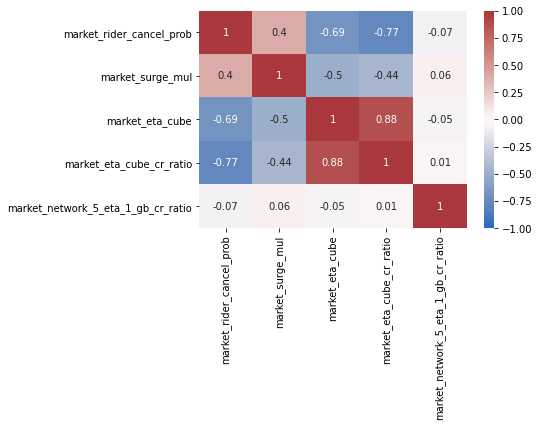

In [115]:
# Visualizing a Pandas Correlation Matrix
corr_matrix = X.loc[:, X.columns != 'intercept'].corr().round(2)
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()